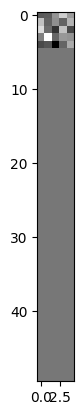

In [1]:
from helpers import *

k = 5
p = 50
n = 100
Z, M, B = create_factors(n, k, p, sig=.8)
Z = normalize_columns(Z)

Zk, Theta_tru, svd_C = compute_k_truncated_svd(Z, k)
_, Theta_hat = svd_convex_optimization(Z, .5*svd_C, k)


# plot Theta_tru as a matrix
import matplotlib.pyplot as plt
plt.imshow(Theta_hat, cmap='gray')


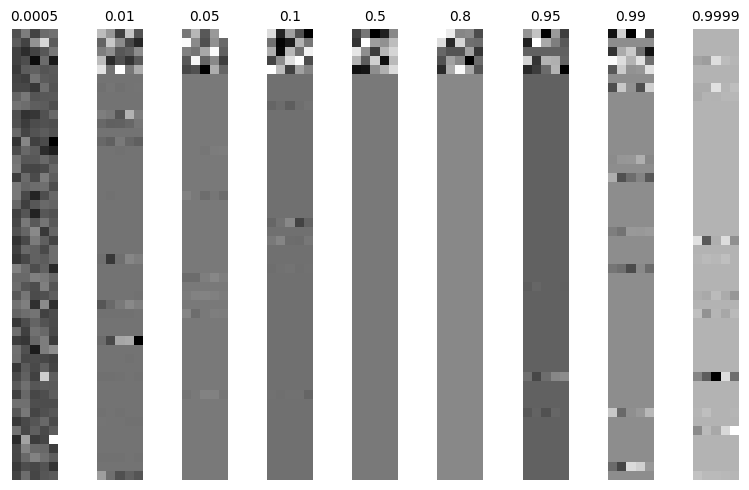

In [2]:
from helpers import *
import matplotlib.pyplot as plt

k = 5
p = 50
n = 100

# set the random seed for reproducibility
np.random.seed(4)

sig_values = [0.0005, 0.01, 0.05, 0.1, 0.5, 0.8, 0.95, 0.99,.9999]

#sig_values = [0.01, 0.02, 0.05, 0.5, 0.8, 0.95, 0.99]

# Adjust the width of the figure to better fit tall matrices.
width_per_plot = .9 # you can tweak this as per your need
total_width = width_per_plot * len(sig_values)
plt.figure(figsize=(total_width, 5))

for i, sig in enumerate(sig_values):
    Z, M, B = create_factors(n, k, p, sig=sig)
    Z = normalize_columns(Z)
    Zk, Theta_tru, svd_C = compute_k_truncated_svd(Z, k)
    _, Theta_hat = svd_convex_optimization(Z, .5*svd_C, k)
    
    plt.subplot(1, len(sig_values), i+1)
    plt.imshow(Theta_hat, cmap='gray')
    plt.title(f'{sig}', fontsize=10)  # Reduced font size
    plt.axis('off')  # Turn off the axis labels and ticks

# Adjust spacing between plots.
plt.subplots_adjust(wspace=0.05)  # wspace controls the width space
plt.tight_layout()
plt.savefig("sgl_vs_noise.png", dpi=300)
plt.show()
